In [2]:
import os
import random

# path of your dataset
PATH = './dataset'
# number of images randomly picked from each 
N = 1
list_signer = os.listdir(PATH)
# store paths of image we choose
list_choice = []
for signer in list_signer:
    list_alphabet = os.listdir(PATH+'/'+signer)
    for alphabet in list_alphabet:            
        list_image = os.listdir(PATH+'/'+signer+'/'+alphabet)
        list_picked = random.sample(list_image, N)
        list_choice.append({'Signer': signer, 'Alphabet': alphabet, 'Images': list_picked})
        
    
print("We picked %d images from %d different signers" %(
    len(list_choice)*N, len(list_signer)))

We picked 120 images from 5 different signers


In [3]:
import numpy as np
import cv2
import skimage.io as io
from skimage import data_dir

%time
# img_data, img_name, im
class sign_language:
    dim = (64,64)
    def __init__(self, path, n):
        self.path = path
        self.signers = os.listdir(path)
        self.img_paths = []
        
        for signer in self.signers:
            alphabets = os.listdir(os.path.join(path,signer))
            for a in alphabets:
                imgs = os.listdir(os.path.join(path,signer,a))
                picks = random.sample(imgs, n)
                self.img_paths.extend([os.path.join(PATH,signer,a,p) for p in picks])
        
        datas = []
        q = 0
        for img in self.img_paths:
           
            try:
                i = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
                resized = cv2.resize(i, dim).reshape(1, 64*64)
                datas.append(resized)
            except:
                q=q+1
                print(i.shape)
                print("Failed to resize: ", img)
            
        print(q)   
        self.data = np.array(datas)
signs = sign_language(PATH, N)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs
(153, 64)
Failed to resize:  ./dataset/A/r/color_17_0482.png
(130, 65)
Failed to resize:  ./dataset/A/u/color_20_0453.png
(138, 94)
Failed to resize:  ./dataset/A/i/depth_8_0204.png
(149, 92)
Failed to resize:  ./dataset/A/n/depth_13_0039.png
(122, 141)
Failed to resize:  ./dataset/A/g/color_6_0169.png
(125, 81)
Failed to resize:  ./dataset/A/t/depth_19_0381.png
(127, 80)
Failed to resize:  ./dataset/A/s/color_18_0220.png
(113, 83)
Failed to resize:  ./dataset/A/a/color_0_0512.png
(153, 103)
Failed to resize:  ./dataset/A/f/color_5_0157.png
(122, 98)
Failed to resize:  ./dataset/A/o/color_14_0430.png
(110, 153)
Failed to resize:  ./dataset/A/h/depth_7_0488.png
(127, 76)
Failed to resize:  ./dataset/A/m/color_12_0266.png
(137, 86)
Failed to resize:  ./dataset/A/c/color_2_0181.png
(161, 89)
Failed to resize:  ./dataset/A/d/color_3_0446.png
(149, 75)
Failed to resize:  ./dataset/A/v/depth_21_0364.png
(82, 142)
Failed to resiz

In [22]:
from matplotlib import pyplot as plt
from PIL import Image
import seaborn as sns

j = Image.open('./dataset/A/g/color_6_0036.png')
# print(i.size)
j = j.convert("L")
print(j)
i = cv2.imread('./dataset/A/g/color_6_0036.png')
# print(i.size)
# i = cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
# print(i.)
i = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
print(i)

# plt.imshow(i)

<PIL.Image.Image image mode=L size=148x118 at 0x1C27F681D0>
[[174 175 177 ...  31  31  31]
 [176 179 184 ...  31  31  31]
 [178 180 182 ...  32  31  32]
 ...
 [189 167 125 ...  86  88  89]
 [191 179 172 ...  86  87  88]
 [149 148 148 ...  83  86  87]]


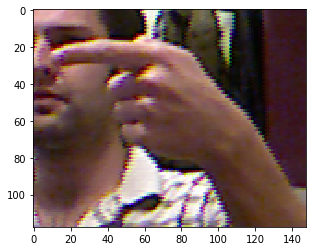

In [11]:
c =plt.get_cmap('gray')
plt.imshow(i, cmap=c)